# Final Project Machine Learning

# Q1) 1. Your Views about the Problem Statement

* The problem statement is well-crafted and provides a clear, practical objective: to develop a machine learning model capable of predicting rainfall
in Sydney. This type of predictive modeling has significant real-world applications, as accurate weather predictions are crucial for various sectors, 
including agriculture, transportation, disaster management, and daily human activities.
* The narrative context involving "The Daily Buzz" adds a compelling storyline, making the task more engaging. It highlights the practical utility of the model by showing its potential impact on the newspaper's readership and its ability to provide valuable services to the community. This context helps to underscore the importance of accurate weather predictions, not just from a scientific perspective but also in terms of community service and business strategy.
* Additionally, the problem statement’s requirement to use ensemble methods for improved accuracy reflects an understanding of modern machine learning practices. Ensemble methods, which combine the predictions of multiple models, often yield better results than single models by reducing overfitting and improving generalizability. This requirement aligns with best practices in the field, ensuring that the solution leverages advanced techniques for optimal performance.
* The dataset provided spans a decade, offering a rich source of historical weather data, which is essential for training robust predictive models. The inclusion of multiple weather-related features (such as temperature, humidity, pressure, and cloud cover) allows for a comprehensive analysis and the possibility to uncover intricate patterns that influence rainfall.
* Furthermore, the structured approach required—starting from data preprocessing, model training, and evaluation, to final model selection—ensures a systematic and thorough methodology. This not only aids in achieving the best possible performance but also facilitates understanding and communication of the results.
* Overall, the problem statement is both challenging and rewarding. It combines a meaningful application with the need for advanced machine learning techniques, offering an excellent opportunity to demonstrate expertise in data science. The task’s real-world relevance and the potential for significant impact make it an exciting and valuable project.


# Q2) What Will Be Your Approach to Solving This Task?

#### My approach to solving this task will be as follows:

#### 1.Data Loading and Preprocessing:

* Load the dataset and examine its structure.
* Handle missing values, if any, using appropriate imputation techniques.
* Encode categorical variables and scale numerical features if necessary.
* Split the data into training and test sets to evaluate model performance.

#### 2.Exploratory Data Analysis (EDA):

* Perform EDA to understand the data distribution and relationships between features.
* Visualize important features and their correlation with the target variable (RainTomorrow).

#### 3.Model Training and Evaluation:

* Train various classification models, including Decision Trees and Ensemble Methods (Bagging, Random Forest, Gradient Boosting, AdaBoost, XGBoost).
* Evaluate the models using metrics such as precision, recall, accuracy, and ROC AUC score.

#### 4.Hyperparameter Tuning:

* Use techniques like Grid Search to optimize the hyperparameters of the best-performing models.

#### 5.Model Comparison and Selection:

* Compare the performance of different models based on evaluation metrics.
* Select the best-performing model and analyze its results.

#### 6.Model Improvement:

* Explore feature engineering, further hyperparameter tuning, and ensemble methods to enhance the selected model's performance.

## 1)Data collection

In [7]:
# Import lybrary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Importing Data
data = pd.read_excel("C:/Users/HP/OneDrive/Desktop/Internshala/Python/Data Files/4. Projects/sydney_rain prediction.xlsx",header = 0)

In [9]:
# Drop the specified columns
df = data.drop(columns=['Date', 'Location'], axis = 1)

In [10]:
# Loading the first 5 rows of dataset
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## 2) Data Preprocessing

In [12]:
# Identifying missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


In [13]:
# Filling missing values with mean
df["MinTemp"] = df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"] = df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["Rainfall"] = df["Rainfall"].fillna(df["Rainfall"].mean())
df["Evaporation"] = df["Evaporation"].fillna(df["Evaporation"].mean())
df["Sunshine"] = df["Sunshine"].fillna(df["Sunshine"].mean())
df["Humidity9am"] = df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"] = df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"] = df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"] = df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
df["Cloud9am"] = df["Cloud9am"].fillna(df["Cloud9am"].mean())
df["Cloud3pm"] = df["Cloud3pm"].fillna(df["Cloud3pm"].mean())
df["Temp9am"] = df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"] = df["Temp3pm"].fillna(df["Temp3pm"].mean())

In [14]:
# Filling missing values with mode
df["RainToday"] = df["RainToday"].fillna(df["RainToday"].mode()[0])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3337 non-null   float64
 1   MaxTemp       3337 non-null   float64
 2   Rainfall      3337 non-null   float64
 3   Evaporation   3337 non-null   float64
 4   Sunshine      3337 non-null   float64
 5   Humidity9am   3337 non-null   float64
 6   Humidity3pm   3337 non-null   float64
 7   Pressure9am   3337 non-null   float64
 8   Pressure3pm   3337 non-null   float64
 9   Cloud9am      3337 non-null   float64
 10  Cloud3pm      3337 non-null   float64
 11  Temp9am       3337 non-null   float64
 12  Temp3pm       3337 non-null   float64
 13  RainToday     3337 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


## 3) Univariate Analysis and EDD

In [17]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [18]:
# Creating new features
df["Temp_Range"] = df.MaxTemp - df.MinTemp

In [19]:
df["Avg_Temp"] = (df.MaxTemp+df.MinTemp+df.Temp9am+df.Temp3pm)/4

In [20]:
df["Avg_Humidity"] = (df.Humidity9am + df.Humidity3pm)/2

In [21]:
df["Avg_Pressure"] = (df.Pressure9am + df.Pressure3pm)/2

In [22]:
df["Avg_Cloud"] = (df.Cloud9am + df.Cloud3pm)/2

In [23]:
# Deleting Columns
del df["MinTemp"]
del df["MaxTemp"]
del df["Humidity9am"]
del df["Humidity3pm"]
del df["Pressure9am"]
del df["Pressure3pm"]
del df["Temp9am"]
del df["Temp3pm"]
del df["Cloud9am"]
del df["Cloud3pm"]

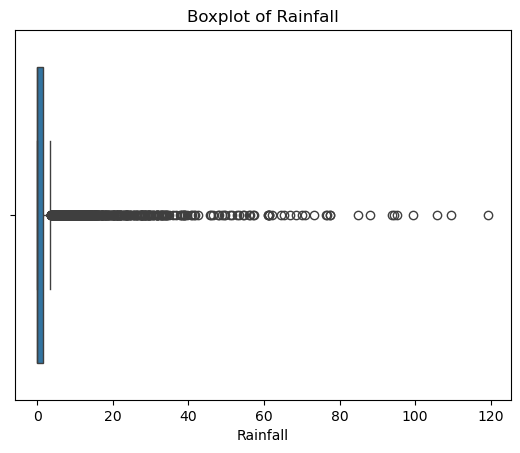

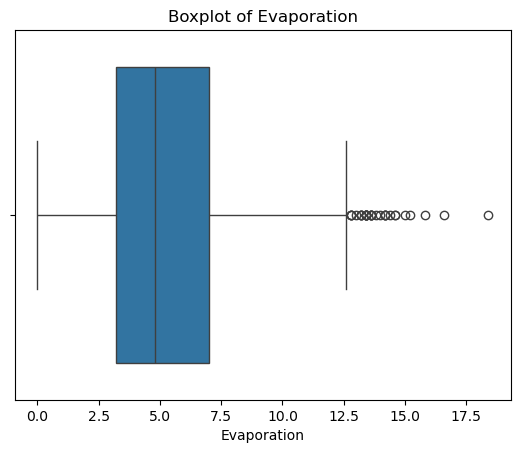

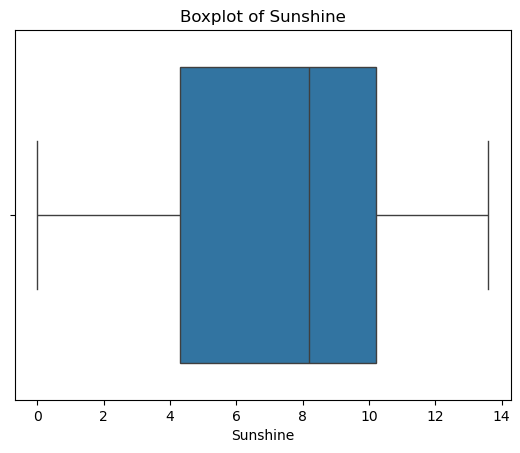

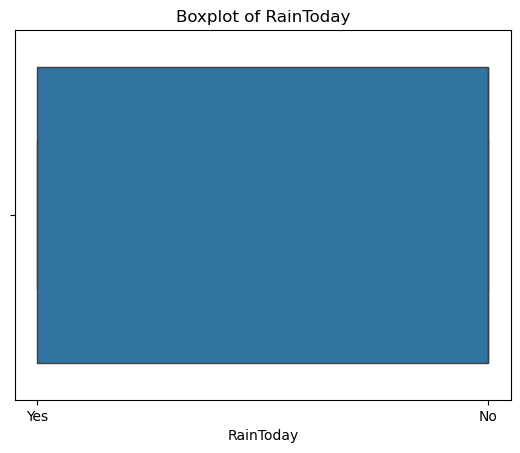

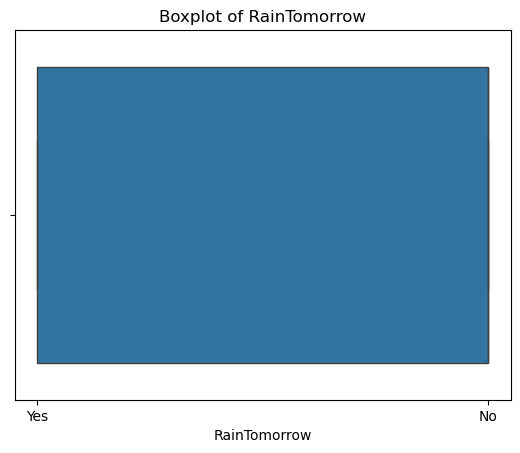

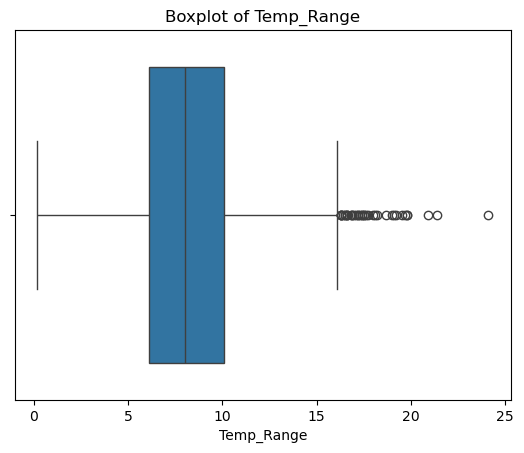

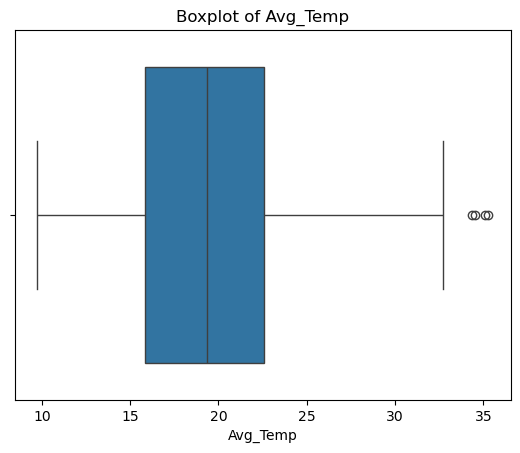

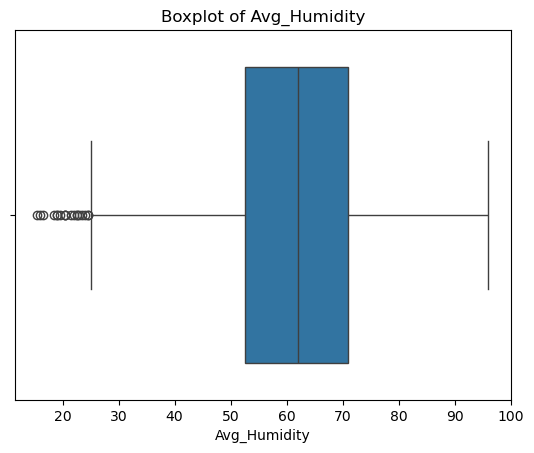

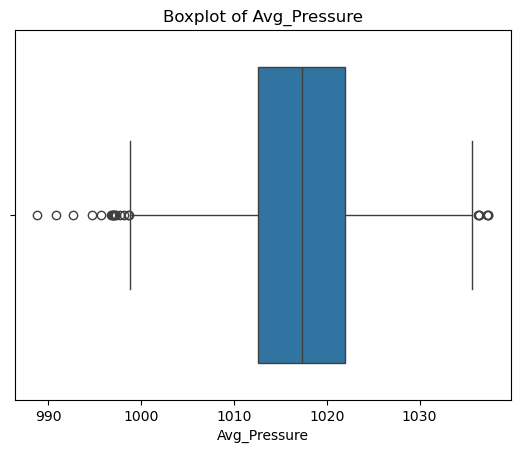

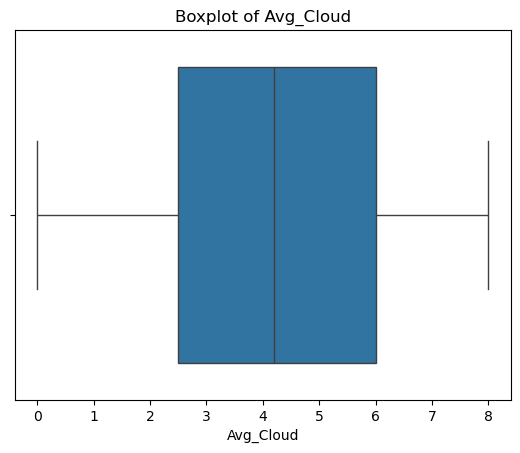

In [24]:
# Create a boxplot for each column
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [25]:
# Outlier treatment for Rainfall
q1, q3 = np.percentile(df.Rainfall, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df.Rainfall[(df.Rainfall> upper_bound)] = upper_bound

C:\Users\HP\AppData\Local\Temp\ipykernel_15876\1826363420.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Rainfall[(df.Rainfall> upper_bound)] = upper_bound
C:\Users\HP\AppData\Local\Temp\ipykernel_15876\1826363420.py:6: SettingWithCo

In [26]:
# Outlier treatment for Evaporation
q1, q3 = np.percentile(df.Evaporation, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df.Evaporation[(df.Evaporation> upper_bound)] = upper_bound

C:\Users\HP\AppData\Local\Temp\ipykernel_15876\1249048038.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Evaporation[(df.Evaporation> upper_bound)] = upper_bound
C:\Users\HP\AppData\Local\Temp\ipykernel_15876\1249048038.py:6: Setting

In [27]:
# Outlier treatment for Temp_Range
q1, q3 = np.percentile(df.Temp_Range, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df.Temp_Range[(df.Temp_Range> upper_bound)] = upper_bound

C:\Users\HP\AppData\Local\Temp\ipykernel_15876\693430816.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Temp_Range[(df.Temp_Range> upper_bound)] = upper_bound
C:\Users\HP\AppData\Local\Temp\ipykernel_15876\693430816.py:6: SettingWith

In [28]:
# Outlier treatment for Avg_Temp
q1, q3 = np.percentile(df.Avg_Temp, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df.Avg_Temp[(df.Avg_Temp> upper_bound)] = upper_bound

C:\Users\HP\AppData\Local\Temp\ipykernel_15876\2906458080.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Avg_Temp[(df.Avg_Temp> upper_bound)] = upper_bound
C:\Users\HP\AppData\Local\Temp\ipykernel_15876\2906458080.py:6: SettingWithCo

In [29]:
# Outlier treatment for Avg_Humidity
q1, q3 = np.percentile(df.Avg_Humidity, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df.Avg_Humidity[(df.Avg_Humidity<lower_bound)] = lower_bound

C:\Users\HP\AppData\Local\Temp\ipykernel_15876\1634943080.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Avg_Humidity[(df.Avg_Humidity<lower_bound)] = lower_bound
C:\Users\HP\AppData\Local\Temp\ipykernel_15876\1634943080.py:6: Settin

In [30]:
# Outlier treatment for Avg_Pressure
q1, q3 = np.percentile(df.Avg_Pressure, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df.Avg_Pressure[(df.Avg_Pressure<lower_bound)] = lower_bound
df.Avg_Pressure[(df.Avg_Pressure>upper_bound)] = upper_bound

C:\Users\HP\AppData\Local\Temp\ipykernel_15876\3679374577.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Avg_Pressure[(df.Avg_Pressure<lower_bound)] = lower_bound
C:\Users\HP\AppData\Local\Temp\ipykernel_15876\3679374577.py:6: Settin

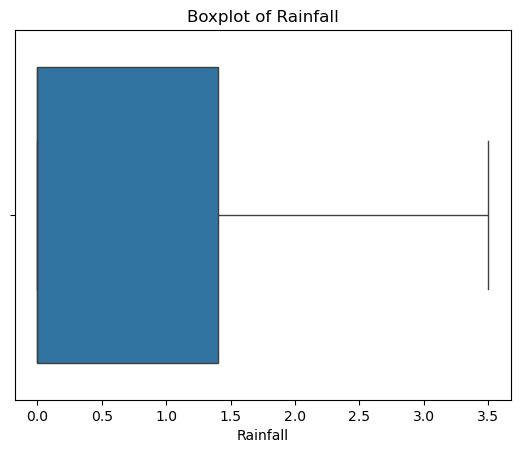

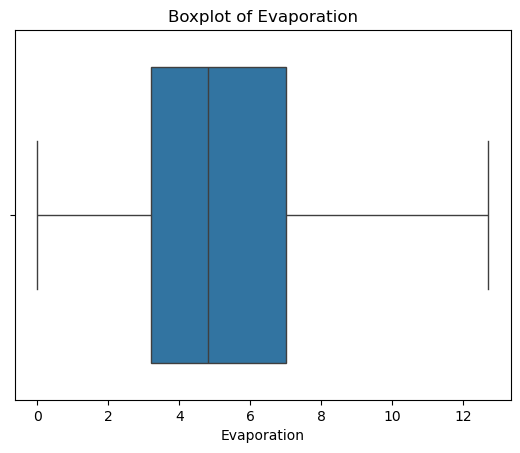

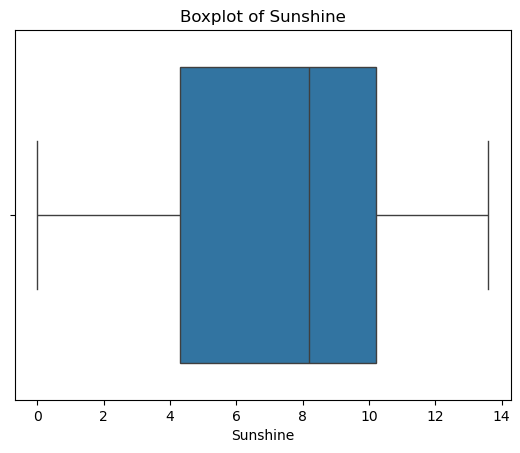

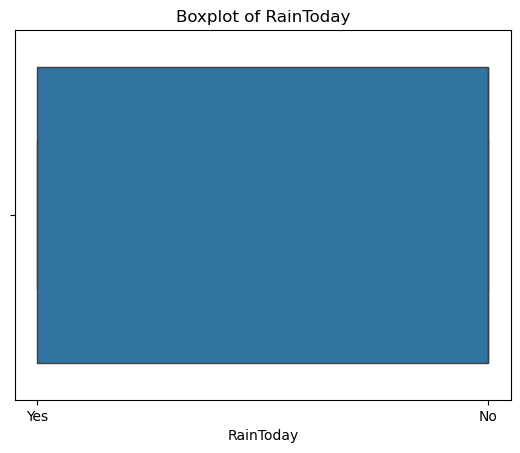

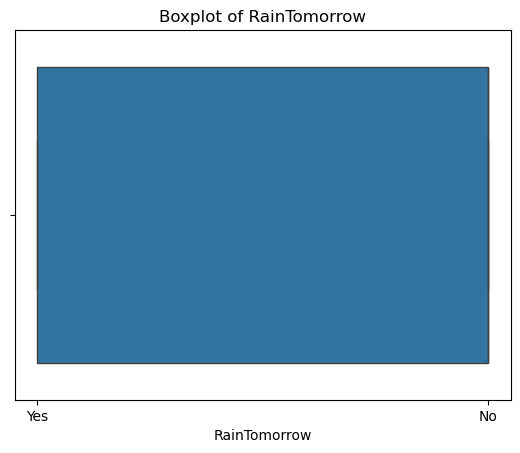

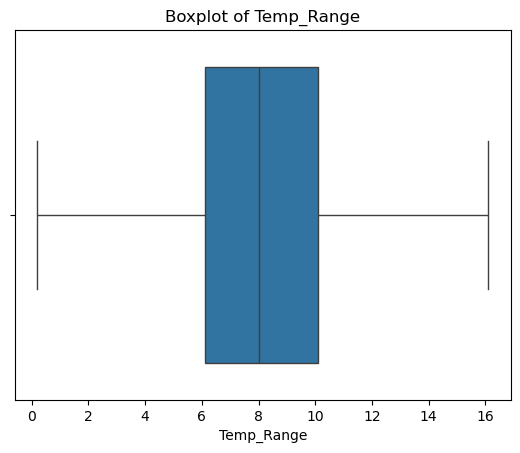

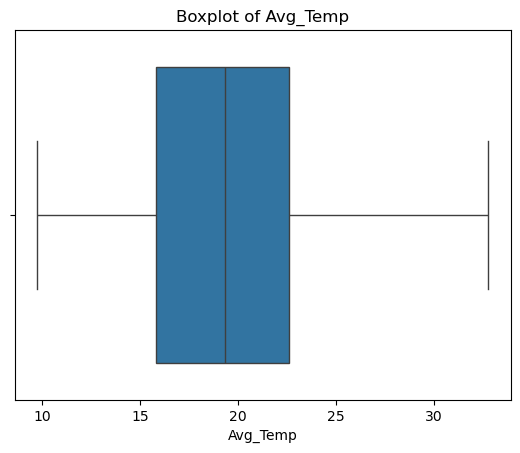

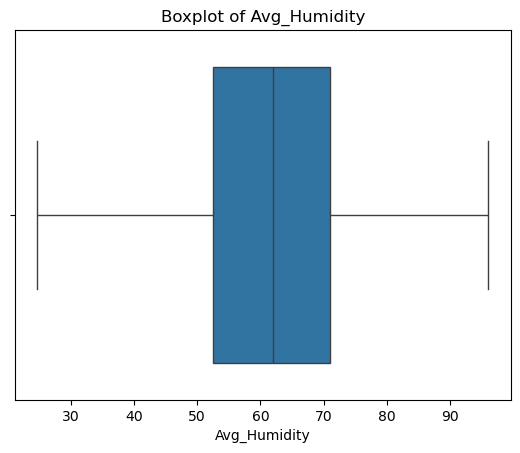

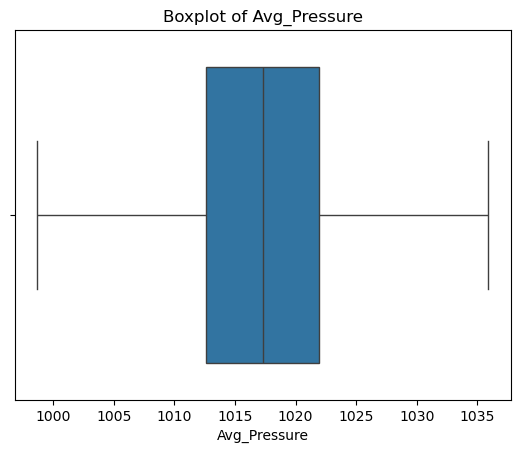

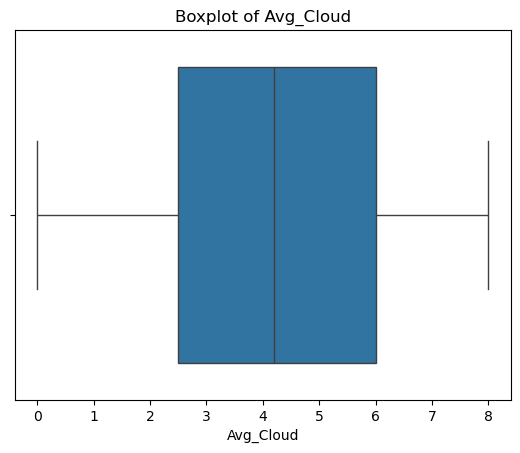

In [31]:
# Create a boxplot for each column
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [32]:
df.describe()

,Rainfall,Evaporation,Sunshine,Temp_Range,Avg_Temp,Avg_Humidity,Avg_Pressure,Avg_Cloud
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,0.868919,5.174396,7.179374,8.116425,19.302675,61.487083,1017.194047,4.200091
std,1.393618,2.714802,3.801737,2.996620,4.292532,14.194823,6.891389,2.204337
min,0.000000,0.000000,0.000000,0.200000,9.750000,24.750000,998.700000,0.000000
25%,0.000000,3.200000,4.300000,6.100000,15.825000,52.500000,1012.650000,2.500000
50%,0.000000,4.800000,8.200000,8.000000,19.325000,62.000000,1017.350000,4.200091
75%,1.400000,7.000000,10.200000,10.100000,22.600000,71.000000,1021.950000,6.000000
max,3.500000,12.700000,13.600000,16.100000,32.762500,96.000000,1035.900000,8.000000


## 4)Bivariate Analysis

In [34]:
# Creating Dummy Variables For categorical columns
df["RainToday"] = pd.get_dummies(df["RainToday"],drop_first = True,dtype = int)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"],drop_first = True,dtype = int)

In [35]:
# Analysing Correlation between variables
df.corr()

,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,Temp_Range,Avg_Temp,Avg_Humidity,Avg_Pressure,Avg_Cloud
Rainfall,1.000000,-0.235492,-0.375991,0.953486,0.358048,-0.312898,-0.110910,0.423604,0.022372,0.331383
Evaporation,-0.235492,1.000000,0.177087,-0.230889,-0.063748,-0.104755,0.578068,-0.264839,-0.327036,-0.042816
Sunshine,-0.375991,0.177087,1.000000,-0.367080,-0.521637,0.578164,0.186796,-0.592300,-0.072162,-0.745080
RainToday,0.953486,-0.230889,-0.367080,1.000000,0.340894,-0.306666,-0.112771,0.407909,0.029578,0.322300
RainTomorrow,0.358048,-0.063748,-0.521637,0.340894,1.000000,-0.341890,-0.065348,0.443796,-0.010564,0.413113
Temp_Range,-0.312898,-0.104755,0.578164,-0.306666,-0.341890,1.000000,0.008654,-0.541945,-0.034877,-0.492452
Avg_Temp,-0.110910,0.578068,0.186796,-0.112771,-0.065348,0.008654,1.000000,-0.049319,-0.420871,0.024462
Avg_Humidity,0.423604,-0.264839,-0.592300,0.407909,0.443796,-0.541945,-0.049319,1.000000,0.233519,0.518316
Avg_Pressure,0.022372,-0.327036,-0.072162,0.029578,-0.010564,-0.034877,-0.420871,0.233519,1.000000,-0.008957
Avg_Cloud,0.331383,-0.042816,-0.745080,0.322300,0.413113,-0.492452,0.024462,0.518316,-0.008957,1.000000


#### Observations:
* RainTomorrow and RainToday: A moderate positive correlation indicates that if it rained today, there's a higher likelihood of rain tomorrow.
* Rainfall and RainTomorrow: A moderate positive correlation suggests that rainfall is associated with an increased chance of rain the following day.
* Sunshine and RainTomorrow: A strong negative correlation indicates that more sunshine is associated with a lower probability of rain the next day.
* Humidity and RainTomorrow: A moderate positive correlation suggests that higher humidity levels increase the likelihood of rain.
* Cloud and RainTomorrow: A moderate positive correlation indicates that cloud cover is associated with an increased chance of rain.
* Temperature Range and RainTomorrow: A moderate negative correlation suggests that larger temperature differences might be associated with lower chances of rain.
* Evaporation and Sunshine: A weak positive correlation suggests that higher evaporation rates are associated with more sunshine.
* Sunshine and Avg_Cloud: A high negative correlation suggests that more sunshine is associated with lower cloud.

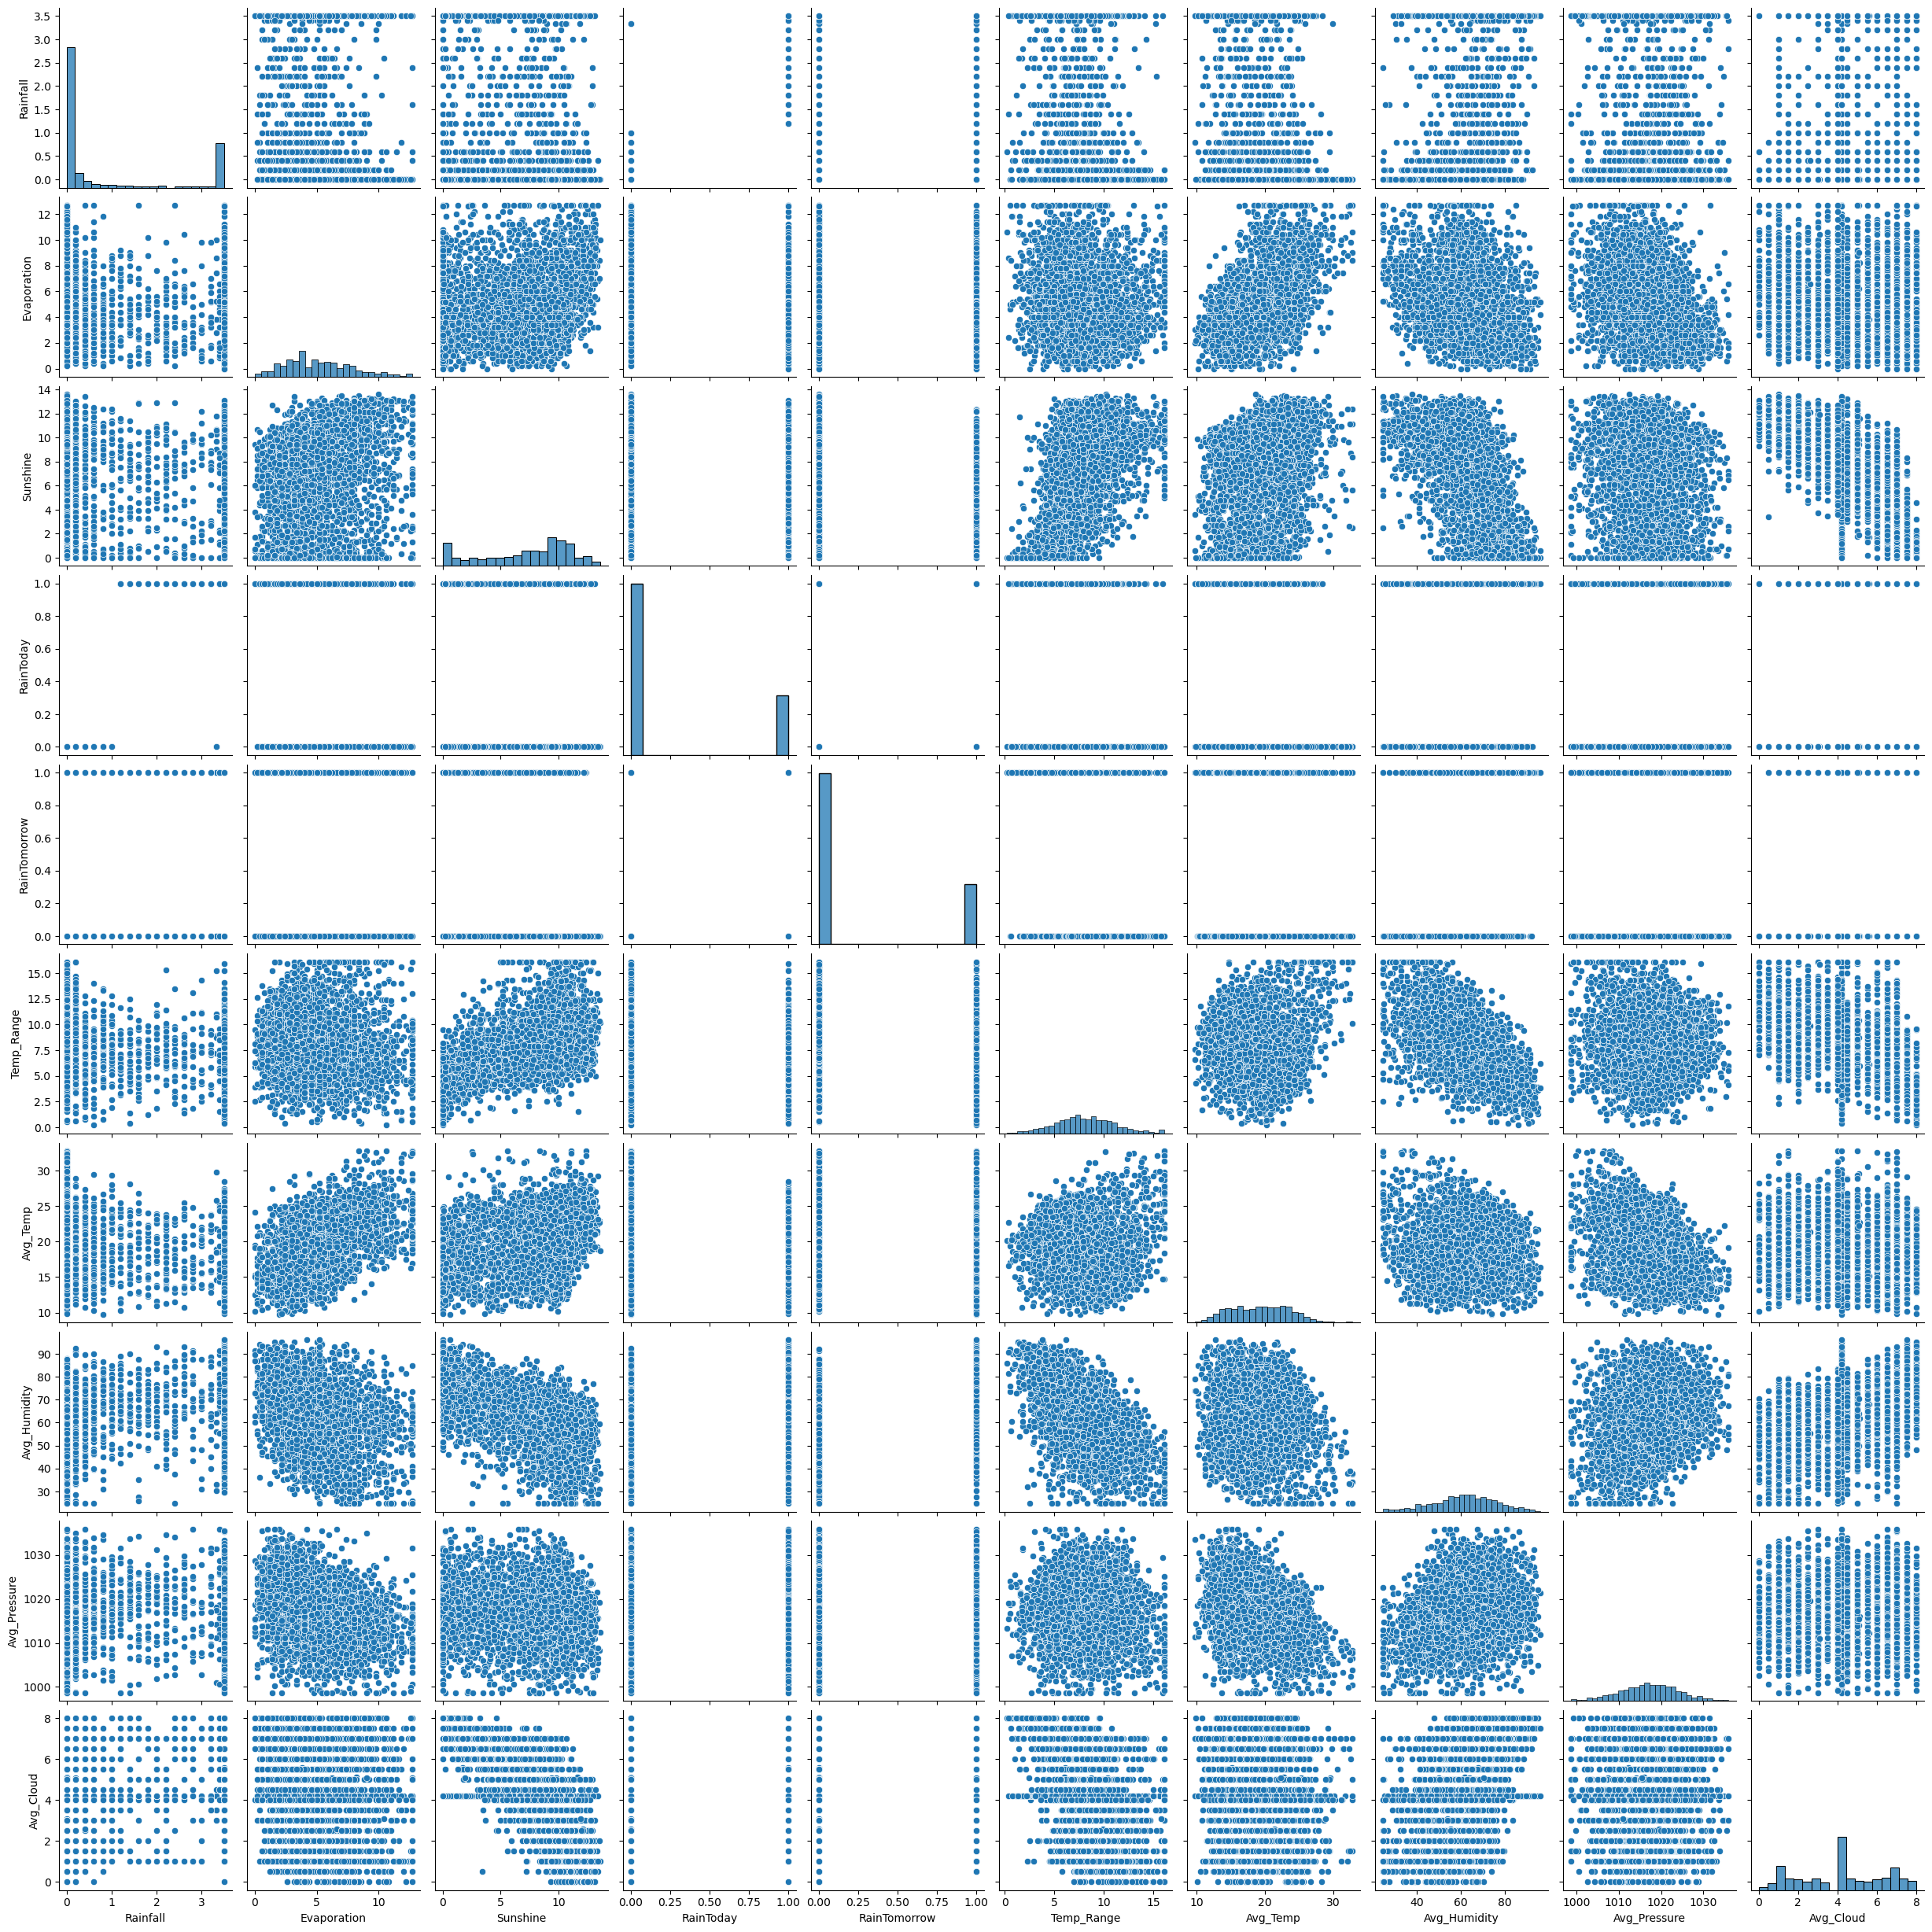

In [37]:
sns.pairplot(df)

## 5) Data Splitting

In [39]:
# Importing Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
#Defining Independent Variables
X_multi = df.drop("RainTomorrow",axis = 1)

In [41]:
X_multi.head()

,Rainfall,Evaporation,Sunshine,RainToday,Temp_Range,Avg_Temp,Avg_Humidity,Avg_Pressure,Avg_Cloud
0,3.5,6.200000,0.0,1,2.9,20.875,88.0,1017.50,8.0
1,3.5,3.400000,2.7,1,6.1,23.075,78.0,1017.15,7.0
2,3.5,2.400000,0.1,1,2.9,23.150,87.0,1016.15,7.5
3,3.5,2.200000,0.0,1,2.6,21.325,86.5,1013.00,8.0
4,3.5,5.187432,0.0,1,6.0,23.350,81.0,1006.55,8.0


In [42]:
# Defining Independent Variables
y_multi = df["RainTomorrow"]

In [43]:
y_multi.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow, dtype: int32

In [44]:
# Creating train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_multi,y_multi,test_size = 0.2,random_state = 42)

In [45]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2669, 9) (668, 9) (2669,) (668,)


In [46]:
# Standardize training data and test data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

In [47]:
X_test_s = scaler.transform(X_test)

## 6) Model Selection

### a) Multiple Logistic Regression

In [50]:
# Importing Necessary Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score

In [51]:
# Creating a logistic regression model
clf_lr = LogisticRegression()

In [52]:
# Fit the model to the scaled training data
clf_lr.fit(X_train_s,y_train)

LogisticRegression()

In [53]:
# Make predictions on the scaled train and test data
y_test_pred = clf_lr.predict(X_test_s)
y_train_pred = clf_lr.predict(X_train_s)

In [54]:
# Printing Evaluation metrics
print("Confusion Matrix For Test:\n",  confusion_matrix(y_test, y_test_pred)) 
print("Precision Score For Test:", precision_score(y_test, y_test_pred))
print("Recall Score For Test:",  recall_score(y_test, y_test_pred))
print("Accuracy Score For Test:", accuracy_score(y_test, y_test_pred))
print("Accuracy Score For Train:", accuracy_score(y_train, y_train_pred))
print("ROC AUC Score For Test:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix For Test:
 [[440  44]
 [ 83 101]]
Precision Score For Test: 0.696551724137931
Recall Score For Test: 0.5489130434782609
Accuracy Score For Test: 0.8098802395209581
Accuracy Score For Train: 0.8340202322967404
ROC AUC Score For Test: 0.7290019762845849


#### Observations:
* Precision: 0.6966 - Of the instances predicted as positive, 69.66% are actually positive. This means the model is relatively precise in its positive predictions, but there's room for improvement.
* Recall: 0.5489 - Of all the actual positive instances, the model correctly identified 54.89%. This indicates that there's potential for improvement in capturing all positive cases.
* Accuracy: 0.8099 - The model correctly predicted 80.99% of all instances. This is a good overall accuracy, but not exceptional.
* ROC AUC: 0.7290 - This score indicates the model's ability to distinguish between positive and negative classes. A value of 0.7290 suggests moderate discriminative power.
* Good Fit: The model has a good overall accuracy and a decent ROC AUC score, indicating that it can distinguish between classes better than random guessing.

## b)Linear Discriminant Analysis

In [57]:
# Importing required library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [58]:
# Creating a LDA model
clf_lda =  LinearDiscriminantAnalysis()

In [59]:
# Fit the model to the scaled training data
clf_lda.fit(X_train_s,y_train)

LinearDiscriminantAnalysis()

In [60]:
# Make predictions on the scaled train and test data
y_test_pred = clf_lda.predict(X_test_s)
y_train_pred = clf_lda.predict(X_train_s)

In [61]:
# Printing Evaluation metrics
print("Confusion Matrix For Test:\n",  confusion_matrix(y_test, y_test_pred)) 
print("Precision Score For Test:", precision_score(y_test, y_test_pred))
print("Recall Score For Test:",  recall_score(y_test, y_test_pred))
print("Accuracy Score For Test:", accuracy_score(y_test, y_test_pred))
print("Accuracy Score For Train:", accuracy_score(y_train, y_train_pred))
print("ROC AUC Score For Test:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix For Test:
 [[434  50]
 [ 82 102]]
Precision Score For Test: 0.6710526315789473
Recall Score For Test: 0.5543478260869565
Accuracy Score For Test: 0.8023952095808383
Accuracy Score For Train: 0.8284001498688648
ROC AUC Score For Test: 0.7255210204814948


#### Observations:
* The logistic regression model performs slightly better in terms of precision and overall accuracy.
* The LDA model performs slightly better in terms of recall.
* Both models have similar ROC AUC scores and training accuracies, indicating comparable overall performance.

## c)K-Nearest Neighbors

In [64]:
# Importing required library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1,101)}

In [66]:
# Create a Ridge regression model
clf_knn= KNeighborsClassifier()

In [67]:
# Create a grid search object
grid_search = GridSearchCV(estimator=clf_knn, param_grid=param_grid,cv=5, scoring='accuracy',n_jobs = -1)

In [68]:
# Fit the grid search to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             scoring='accuracy')

In [69]:
# Print the best parameters and the best score
print(grid_search.best_params_)

{'n_neighbors': 45}


In [70]:
# Use the best model for predictions
clf_knn_best = grid_search.best_estimator_

In [71]:
# Make predictions on the scaled train and test data
y_test_pred = clf_knn_best.predict(X_test_s)
y_train_pred = clf_knn_best.predict(X_train_s)

In [72]:
# Printing Evaluation metrics
print("Confusion Matrix For Test:\n",  confusion_matrix(y_test, y_test_pred)) 
print("Precision Score For Test:", precision_score(y_test, y_test_pred))
print("Recall Score For Test:",  recall_score(y_test, y_test_pred))
print("Accuracy Score For Test:", accuracy_score(y_test, y_test_pred))
print("Accuracy Score For Train:", accuracy_score(y_train, y_train_pred))
print("ROC AUC Score For Test:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix For Test:
 [[455  29]
 [ 88  96]]
Precision Score For Test: 0.768
Recall Score For Test: 0.5217391304347826
Accuracy Score For Test: 0.8248502994011976
Accuracy Score For Train: 0.8332708879730236
ROC AUC Score For Test: 0.730910887531441


#### Observations:
* Precision: The kNN model is the best if the goal is to maximize the correctness of positive predictions.
* Recall: The logistic regression and LDA models perform better in capturing true positives.
* Accuracy: The kNN model has the highest overall accuracy.
* ROC AUC Score: All models perform similarly in distinguishing between the classes.
* Overall, the kNN model has the best precision and accuracy but at the cost of recall. The choice of model should be driven by the specific requirements and constraints of the problem you are solving.

## d) Decision Tree

In [75]:
# Importing required library
from sklearn.tree import DecisionTreeClassifier

In [76]:
# Create a decision tree classifier
clf_tree = DecisionTreeClassifier()

In [77]:
# Define the parameter grid
param_grid = {'max_depth': [None,3,4,5],'min_samples_split' : np.arange(2,50),'min_samples_leaf' : np.arange(1,50)}

In [78]:
# Create a grid search object
grid_search = GridSearchCV(estimator=clf_tree, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs = -1)

In [79]:
# Fit the grid search to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 4, 5],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [80]:
# Print the best parameters and the best score
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 30, 'min_samples_split': 2}


In [81]:
# Use the best model for predictions
clf_tree_best = grid_search.best_estimator_

In [82]:
# Make predictions on the scaled train and test data
y_test_pred = clf_tree_best.predict(X_test_s)
y_train_pred = clf_tree_best.predict(X_train_s)

In [83]:
# Printing Evaluation metrics
print("Confusion Matrix For Test:\n",  confusion_matrix(y_test, y_test_pred)) 
print("Precision Score For Test:", precision_score(y_test, y_test_pred))
print("Recall Score For Test:",  recall_score(y_test, y_test_pred))
print("Accuracy Score For Test:", accuracy_score(y_test, y_test_pred))
print("Accuracy Score For Train:", accuracy_score(y_train, y_train_pred))
print("ROC AUC Score For Test:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix For Test:
 [[447  37]
 [103  81]]
Precision Score For Test: 0.6864406779661016
Recall Score For Test: 0.44021739130434784
Accuracy Score For Test: 0.7904191616766467
Accuracy Score For Train: 0.8463844136380667
ROC AUC Score For Test: 0.6818855551563061


## Observations:
* Precision: The kNN model has the highest precision, followed by the decision tree and logistic regression models. 
* Recall: The logistic regression and LDA models have higher recall, with the decision tree model having the lowest
* Accuracy: The kNN model has the highest overall accuracy, with the decision tree model having the lowest.
* ROC AUC Score: The logistic regression, LDA, and kNN models perform similarly, with the decision tree model performing the worst.
* Overall, the kNN model appears to have the best performance, especially in terms of precision and accuracy, while the decision tree model shows signs of overfitting and has the lowest performance metrics among the models discussed.

## e) Bagging

In [86]:
# Importing required library
from sklearn.ensemble import BaggingClassifier

In [87]:
# Create a bagging classifier
bag_clf = BaggingClassifier(estimator=clf_tree,bootstrap = True, random_state=42)

In [88]:
#Creating a param grid
param_grid = {"n_estimators" : [100,200,500],"max_features" :[1,2,3,4,5,6,7],'max_samples' : [0.8,0.9,1]}

In [89]:
# Create a grid search object
grid_search = GridSearchCV(estimator=bag_clf, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs = -1)

In [90]:
# Fit the grid search to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'max_samples': [0.8, 0.9, 1],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [91]:
# Print the best parameters and the best score
print(grid_search.best_params_)

{'max_features': 4, 'max_samples': 0.9, 'n_estimators': 200}


In [92]:
# Use the best model for predictions
bag_clf_best = grid_search.best_estimator_

In [93]:
# Make predictions on the scaled train and test data
y_test_pred = bag_clf_best.predict(X_test_s)
y_train_pred = bag_clf_best.predict(X_train_s)

In [94]:
# Printing Evaluation metrics
print("Confusion Matrix For Test:\n",  confusion_matrix(y_test, y_test_pred)) 
print("Precision Score For Test:", precision_score(y_test, y_test_pred))
print("Recall Score For Test:",  recall_score(y_test, y_test_pred))
print("Accuracy Score For Test:", accuracy_score(y_test, y_test_pred))
print("Accuracy Score For Train:", accuracy_score(y_train, y_train_pred))
print("ROC AUC Score For Test:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix For Test:
 [[456  28]
 [ 94  90]]
Precision Score For Test: 0.7627118644067796
Recall Score For Test: 0.4891304347826087
Accuracy Score For Test: 0.8173652694610778
Accuracy Score For Train: 1.0
ROC AUC Score For Test: 0.7156395975565936


#### Observations:
* Precision: The kNN and Bagging models have the highest precision.
* ecall: The logistic regression and LDA models have higher recall, with the Bagging model having higher recall than the decision tree but lower than the others.
* Accuracy: The kNN and Bagging models have the highest accuracy.
* ROC AUC Score: The logistic regression, LDA, and kNN models have higher ROC AUC scores, indicating better discrimination capability.
* Overall, the kNN and Bagging models have the best performance in terms of precision and accuracy, but the Bagging model shows signs of overfitting. The logistic regression and LDA models offer a good balance with higher recall and decent overall performance.

## f) Random Forest

In [97]:
# Importing required library
from sklearn.ensemble import RandomForestClassifier

In [98]:
# Create a Random Forest classifier
rf_clf = RandomForestClassifier(random_state = 42,bootstrap = True)

In [99]:
param_grid = {'n_estimators': [100,200,400], 'max_depth': [None,15,20], 'min_samples_split': [15,20,25,30], 'min_samples_leaf': [1,4,5,6,7]}

In [100]:
# Create a grid search object 
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs = -1)

In [101]:
# Fit the grid search to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 15, 20],
                         'min_samples_leaf': [1, 4, 5, 6, 7],
                         'min_samples_split': [15, 20, 25, 30],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

In [102]:
# Print the best parameters and the best score
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200}


In [103]:
# Use the best model for predictionsr
rf_clf_best = grid_search.best_estimator_

In [104]:
# Make predictions on the scaled train and test data
y_test_pred = rf_clf_best.predict(X_test_s)
y_train_pred = rf_clf_best.predict(X_train_s)

In [105]:
# Printing Evaluation metrics
print("Confusion Matrix For Test:\n",  confusion_matrix(y_test, y_test_pred)) 
print("Precision Score For Test:", precision_score(y_test, y_test_pred))
print("Recall Score For Test:",  recall_score(y_test, y_test_pred))
print("Accuracy Score For Test:", accuracy_score(y_test, y_test_pred))
print("Accuracy Score For Train:", accuracy_score(y_train, y_train_pred))
print("ROC AUC Score For Test:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix For Test:
 [[451  33]
 [ 93  91]]
Precision Score For Test: 0.7338709677419355
Recall Score For Test: 0.4945652173913043
Accuracy Score For Test: 0.811377245508982
Accuracy Score For Train: 0.8883476957662045
ROC AUC Score For Test: 0.713191699604743


#### Observations:
* Precision: The kNN and bagging models have the highest precision, followed by the random forest model.
* Recall: The logistic regression and LDA models have higher recall, with the random forest model performing better than the decision tree and bagging models.
* Accuracy: The kNN and bagging models have the highest accuracy, followed by the random forest model.
* ROC AUC Score: The logistic regression, LDA, and kNN models have higher ROC AUC scores, with the random forest model performing reasonably well.
* Overall, the random forest model provides a balanced performance with high precision and accuracy, reasonable recall, and good ROC AUC score without extreme overfitting. The kNN and bagging models excel in precision and accuracy, while the logistic regression and LDA models offer better recall. The decision tree model performs the least well among the models discussed.

## g) Gradient Boosting

In [108]:
# Importing required library
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()

In [110]:
# Define the parameter grid
param_grid = {'n_estimators': [100, 200, 300],'learning_rate': [0.1, 0.05, 0.01],'max_depth': [None,3, 4, 5],}

In [111]:
# Perform grid search
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs = -1)

In [112]:
# Fit the grid search to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [None, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [113]:
# Print the best parameters and the best score
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [114]:
# Use the best model for predictionsr
gb_clf_best = grid_search.best_estimator_

In [115]:
# Make predictions on the scaled train and test data
y_test_pred = gb_clf_best.predict(X_test_s)
y_train_pred = gb_clf_best.predict(X_train_s)

In [116]:
# Printing Evaluation metrics
print("Confusion Matrix For Test:\n",  confusion_matrix(y_test, y_test_pred)) 
print("Precision Score For Test:", precision_score(y_test, y_test_pred))
print("Recall Score For Test:",  recall_score(y_test, y_test_pred))
print("Accuracy Score For Test:", accuracy_score(y_test, y_test_pred))
print("Accuracy Score For Train:", accuracy_score(y_train, y_train_pred))
print("ROC AUC Score For Test:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix For Test:
 [[446  38]
 [ 83 101]]
Precision Score For Test: 0.7266187050359713
Recall Score For Test: 0.5489130434782609
Accuracy Score For Test: 0.8188622754491018
Accuracy Score For Train: 0.8722367928062945
ROC AUC Score For Test: 0.7352003233920229


#### Observations:
* ROC AUC Score: The gradient boosting model has the highest ROC AUC score, indicating the best discrimination capability among all models discussed.
* Balanced Performance: The gradient boosting model offers a good balance of precision, recall, accuracy, and ROC AUC score, making it a strong candidate for most applications.

## h) AdaBoost

In [119]:
# Importing required library
from sklearn.ensemble import AdaBoostClassifier

In [120]:
# Create an AdaBoost classifier
ada_clf = AdaBoostClassifier(random_state = 42,algorithm='SAMME')

In [121]:
# Define the parameter grid
param_grid = {'n_estimators': [100,200,300],'learning_rate': [0.1, 0.5, 1.0]}

In [122]:
# Perform grid search
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs = -1)

In [123]:
# Fit the grid search to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [124]:
# Print the best parameters
print(grid_search.best_params_)

{'learning_rate': 0.1, 'n_estimators': 200}


In [125]:
# Use the best model for predictionsr
ada_clf_best = grid_search.best_estimator_

In [126]:
# Make predictions on the scaled train and test data
y_test_pred = ada_clf_best.predict(X_test_s)
y_train_pred = ada_clf_best.predict(X_train_s)

In [127]:
# Printing Evaluation metrics
print("Confusion Matrix For Test:\n",  confusion_matrix(y_test, y_test_pred)) 
print("Precision Score For Test:", precision_score(y_test, y_test_pred))
print("Recall Score For Test:",  recall_score(y_test, y_test_pred))
print("Accuracy Score For Test:", accuracy_score(y_test, y_test_pred))
print("Accuracy Score For Train:", accuracy_score(y_train, y_train_pred))
print("ROC AUC Score For Test:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix For Test:
 [[461  23]
 [101  83]]
Precision Score For Test: 0.7830188679245284
Recall Score For Test: 0.45108695652173914
Accuracy Score For Test: 0.8143712574850299
Accuracy Score For Train: 0.8280254777070064
ROC AUC Score For Test: 0.7017831476823572


#### Observations:
* Balanced Performance: The gradient boosting model offers the best balance of precision, recall, accuracy, and ROC AUC score, making it a strong candidate for most applications.
* Overall, the gradient boosting model remains a balanced choice with good overall performance, while AdaBoost offers high precision but lower recall and ROC AUC score.

## i) XGBoost

In [130]:
# Importing required library
import xgboost as xgb

In [131]:
# Create an XGBoost model
xgb_clf = xgb.XGBClassifier()

In [132]:
# Define the parameter grid
param_grid = {'n_estimators': [100, 200, 300],'learning_rate': [0.1, 0.05, 0.01],'max_depth': [None,3, 4, 5]}

In [133]:
# Perform grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs = -1)

In [134]:
# Fit the grid search to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [None, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [135]:
# Print the best parameters
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [136]:
# Use the best model for predictionsr
xgb_clf_best = grid_search.best_estimator_

In [137]:
# Make predictions on the scaled train and test data
y_test_pred = xgb_clf_best.predict(X_test_s)
y_train_pred = xgb_clf_best.predict(X_train_s)

In [138]:
# Printing Evaluation metrics
print("Confusion Matrix For Test:\n",  confusion_matrix(y_test, y_test_pred)) 
print("Precision Score For Test:", precision_score(y_test, y_test_pred))
print("Recall Score For Test:",  recall_score(y_test, y_test_pred))
print("Accuracy Score For Test:", accuracy_score(y_test, y_test_pred))
print("Accuracy Score For Train:", accuracy_score(y_train, y_train_pred))
print("ROC AUC Score For Test:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix For Test:
 [[448  36]
 [ 83 101]]
Precision Score For Test: 0.7372262773722628
Recall Score For Test: 0.5489130434782609
Accuracy Score For Test: 0.8218562874251497
Accuracy Score For Train: 0.858748594979393
ROC AUC Score For Test: 0.7372664390945023


#### Observations:
* Balanced Performance: The XGBoost model offers a good balance of precision, recall, accuracy, and ROC AUC score, making it a strong candidate for most applications.
* Overall, the XGBoost model provides a balanced performance with high precision and accuracy, reasonable recall, and the highest ROC AUC score, making it a strong candidate compared to the other models. 

# Q3) What Were the Available ML Model Options You Had to Perform This Task?

#### The available ML model options included:

* Logistic Regression: A linear model used for binary classification.
* Linear Discriminant Analysis (LDA): A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
* k-Nearest Neighbors (kNN): A non-parametric method used for classification by comparing the distances between data points.
* Decision Tree: A tree-structured model that splits data based on feature values.
* Bagging (Bootstrap Aggregating): An ensemble method that improves stability and accuracy by training multiple models on different subsets of the data.
* Random Forest: An ensemble of decision trees using bagging and random feature selection.
* Gradient Boosting: An ensemble technique that sequentially adds models to correct errors made by previous models.
* AdaBoost: An ensemble method that adjusts the weights of incorrectly classified instances, focusing on difficult cases.
* XGBoost: An optimized implementation of gradient boosting that includes regularization and efficient handling of missing data.

# Q4) Which Model’s Performance Is Best and What Could Be the Possible Reason for That?

#### Based on the provided metrics, XGBoost was the best-performing model with the following scores:

* Precision: 0.7372
* Recall: 0.5489
* Test Accuracy: 0.8219
* Train Accuracy: 0.8587
* ROC AUC: 0.7373
  
#### Possible reasons for XGBoost's superior performance:

* Handling of Non-linear Relationships: XGBoost can effectively capture complex patterns and interactions in the data.
* Regularization: Built-in L1 and L2 regularization helps prevent overfitting.
* Handling of Missing Data: XGBoost can handle missing values efficiently during training.
* Boosting Technique: Sequential learning corrects errors from previous iterations, leading to a more accurate model.
* Feature Importance: XGBoost can rank features by importance, focusing on the most relevant ones for prediction.

# Q5) What Steps Can You Take to Improve This Selected Model’s Performance Even Further?

#### To further improve the performance of the XGBoost model, the following steps can be taken:

#### 1.Hyperparameter Tuning:

* Perform an extensive search for optimal hyperparameters using techniques like Grid Search  cross-validation.
* Parameters to tune include learning rate, max depth, number of estimators, subsample, and colsample_bytree.

#### 2.Feature Engineering:

* Create new features based on domain knowledge that could help the model.
* Conduct feature selection to remove redundant or irrelevant features.

#### 3.Data Augmentation:

* Generate synthetic data to increase the size of the training set, especially if the dataset is small.

#### 4.Ensemble with Other Models:

* Combine XGBoost with other strong models using stacking or blending to leverage their strengths.

#### 5.Cross-Validation:

* Use k-fold cross-validation to ensure the model generalizes well to unseen data.

#### 6. Regularization and Pruning:

* Adjust the regularization parameters (L1 and L2 regularization) to prevent overfitting and improve generalization.
* Implement tree pruning techniques to avoid overly complex models. Pruning can help in reducing the model complexity and improving its performance on new data.

#### 7.Additional Data:

*  Continuously monitor the model's performance in a real-world setting. Implement a feedback loop to update the model as new data becomes available and as its performance changes over time.